# Project 2 Stock analysis Tata Motors

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [22]:
df = pd.read_csv("D:\\Summer training\\TATAMOTORS.csv.xls")

In [23]:
mpl.rcParams['figure.figsize'] = [20, 10]

In [24]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [25]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,TATAMOTORS,EQ,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,9.067386e+14,173282.0,3291167.0,0.1076
5302,2021-04-27,TATAMOTORS,EQ,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1.047879e+15,191627.0,5215100.0,0.1488
5303,2021-04-28,TATAMOTORS,EQ,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1.372278e+15,264159.0,5116568.0,0.1145
5304,2021-04-29,TATAMOTORS,EQ,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1.116900e+15,186996.0,4193346.0,0.1144
5305,2021-04-30,TATAMOTORS,EQ,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1.072849e+15,227806.0,7898988.0,0.2187


In [26]:
df.shape

(5306, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [28]:
df.count()

Date                  5306
Symbol                5306
Series                5306
Prev Close            5306
Open                  5306
High                  5306
Low                   5306
Last                  5306
Close                 5306
VWAP                  5306
Volume                5306
Turnover              5306
Trades                2456
Deliverable Volume    4792
%Deliverble           4792
dtype: int64

In [29]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [30]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03,2456.00,4792.00,4792.00
mean,409.43,410.15,417.12,402.18,409.45,409.45,409.76,1.046560e+07,2.790772e+14,128439.98,2805962.22,0.36
std,272.48,272.97,277.02,268.03,272.52,272.47,272.49,2.185034e+07,4.674351e+14,104954.58,3579713.03,0.16
min,58.80,58.00,60.70,57.55,58.75,58.80,59.24,1.235100e+04,1.069384e+11,3434.00,12351.00,0.04
25%,174.60,174.76,178.82,171.01,174.72,174.60,175.18,1.668994e+06,7.049025e+13,75478.25,646920.00,0.23
50%,377.25,378.90,384.75,372.60,377.52,377.25,378.46,4.141648e+06,1.967418e+14,100034.00,1636751.50,0.36
75%,523.15,523.48,530.80,515.91,523.49,523.15,523.72,8.706037e+06,3.175959e+14,142064.75,3761212.25,0.48
max,1365.15,1361.00,1382.00,1347.00,1362.00,1365.15,1362.15,3.905778e+08,9.365671e+15,1318669.00,73338482.00,1.00


In [33]:
df["Date"]=pd.to_datetime(df["Date"])

In [34]:
df.drop(['Trades','Deliverable Volume','%Deliverble','Symbol','Series'], axis =1 , inplace = True)

In [35]:
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
0,2000-01-03,201.60,207.4,217.25,207.40,217.00,216.75,214.28,676126,1.448775e+13
1,2000-01-04,216.75,217.0,219.00,206.00,211.90,208.20,209.50,679215,1.422962e+13
2,2000-01-05,208.20,194.0,217.80,194.00,213.10,213.25,210.33,1120951,2.357684e+13
3,2000-01-06,213.25,215.0,229.90,215.00,222.00,222.10,225.29,1968998,4.435932e+13
4,2000-01-07,222.10,224.0,239.90,223.10,239.90,239.90,236.32,2199431,5.197636e+13
...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,294.00,297.0,299.00,294.60,295.85,295.40,296.48,30583139,9.067386e+14
5302,2021-04-27,295.40,295.7,302.50,295.10,302.10,301.50,299.05,35040532,1.047879e+15
5303,2021-04-28,301.50,303.5,309.50,303.00,305.15,305.90,307.22,44668126,1.372278e+15
5304,2021-04-29,305.90,308.9,310.00,301.25,302.20,301.90,304.77,36647292,1.116900e+15


In [36]:
df['Month']= df["Date"].dt.month
df['Year']= df["Date"].dt.year
df['Day']= df["Date"].dt.day


In [37]:
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Month,Year,Day
0,2000-01-03,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,1,2000,3
1,2000-01-04,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,1,2000,4
2,2000-01-05,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,1,2000,5
3,2000-01-06,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,1,2000,6
4,2000-01-07,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,1,2000,7


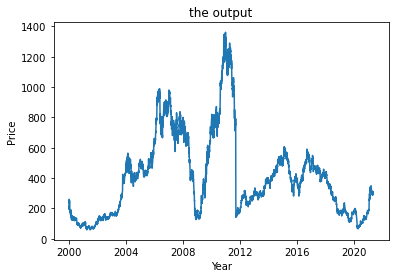

In [27]:
x = df['Date']
y = df['Open']

plt.xlabel("Year")
plt.ylabel("Price")
plt.title("the output")

plt.plot(x,y)

plt.show()

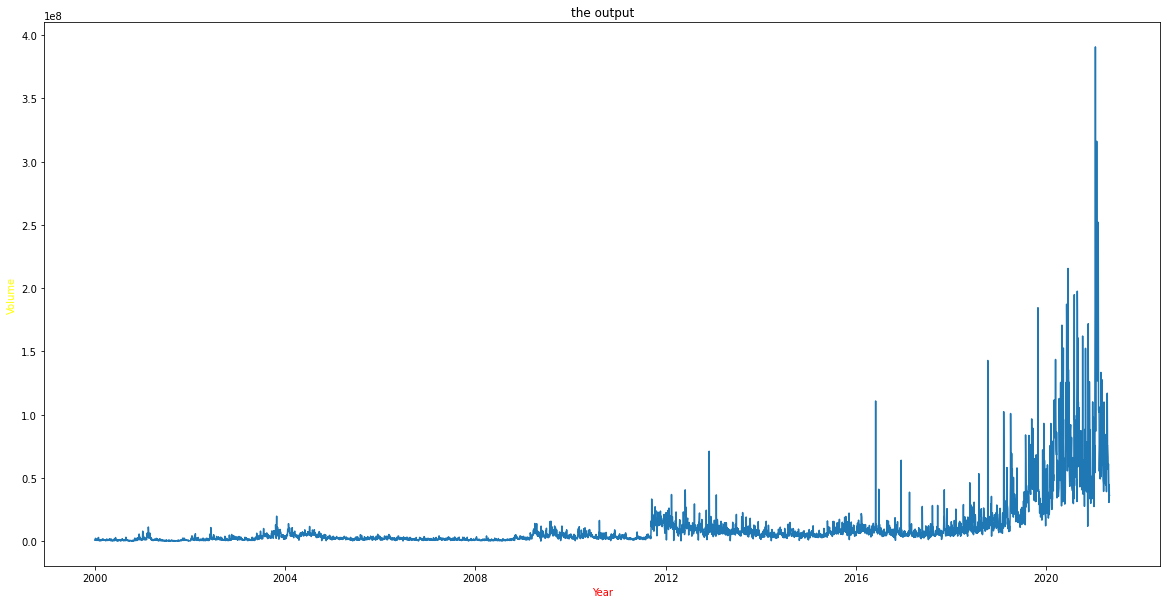

In [39]:
x = df['Date']
y = df['Volume']

plt.xlabel("Year", color='Red')
plt.ylabel("Volume", color='yellow')
plt.title("the output")

plt.plot(x,y)

plt.show()

In [40]:
# Return of investment ()

sumTM = 0 # number of shares owned

s1 = 0 # number of share owned

# total number invested and number of shares owned

for i in range(len(df)):
    if df.loc[i,'Day']==30:
        
        sumTM+= df.loc[i,'Open']
        
        s1+=1

In [41]:
# displaying basic results

print("Total in tata motars = Rs", round(sumTM,2))

print("Shares Owned of Tata Motors=" , s1)

print("Average Investment of 1 share =Rs", round((sumTM/s1),2))

Total in tata motars = Rs 65977.3
Shares Owned of Tata Motors= 162
Average Investment of 1 share =Rs 407.27


In [43]:
tm_end = 298.2 #last open price of tata Motors on 2021/04/30

#obtained by looking at the date or can be seen after executing tata_motors.tail()

#calculating investment result

result1 = round((tm_end*s1)-sumTM,2)
roiTM= round((result1/sumTM)*100,2)

In [45]:
# displaying investment results

print("nInvestment Results:")

if result1<0:
    print("Net Unrealised Loss = Rs", result1)
    
else:
    print("Net Unrealised Profit = Rs", result1)
    
print("Tata Motors ROI from 2000-1-03 to 2021-04-30 = ", roiTM,"%")
    

nInvestment Results:
Net Unrealised Loss = Rs -17668.9
Tata Motors ROI from 2000-1-03 to 2021-04-30 =  -26.78 %


In [46]:
final = df.groupby(['Day']).aggregate({'Open': 'sum', 'Day': 'count'})

In [47]:
final

,Open,Day
Day,,
1,66952.80,162
2,63771.60,155
3,73108.45,179
4,73779.60,180
5,74091.10,180
6,70068.00,171
7,74955.60,180
8,75746.90,178
9,73284.10,177


In [48]:
final["Last"] = (292.85*final['Day']) - final['Open']

In [49]:
final

,Open,Day,Last
Day,,,
1,66952.80,162,-19511.10
2,63771.60,155,-18379.85
3,73108.45,179,-20688.30
4,73779.60,180,-21066.60
5,74091.10,180,-21378.10
6,70068.00,171,-19990.65
7,74955.60,180,-22242.60
8,75746.90,178,-23619.60
9,73284.10,177,-21449.65


In [50]:
final["Profit"] = (final['Last']/final['Open'])*100
final

,Open,Day,Last,Profit
Day,,,,
1,66952.80,162,-19511.10,-29.141574
2,63771.60,155,-18379.85,-28.821372
3,73108.45,179,-20688.30,-28.298097
4,73779.60,180,-21066.60,-28.553421
5,74091.10,180,-21378.10,-28.853803
6,70068.00,171,-19990.65,-28.530356
7,74955.60,180,-22242.60,-29.674367
8,75746.90,178,-23619.60,-31.182266
9,73284.10,177,-21449.65,-29.269173


In [51]:
final = final[['Day','Profit']]

In [52]:
final["Day"] = final.index

C:\Users\91914\AppData\Local\Temp\ipykernel_18112\3735249269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final["Day"] = final.index


In [53]:
final.reset_index(drop=True)

,Day,Profit
0,1,-29.141574
1,2,-28.821372
2,3,-28.298097
3,4,-28.553421
4,5,-28.853803
5,6,-28.530356
6,7,-29.674367
7,8,-31.182266
8,9,-29.269173
9,10,-29.803866


In [54]:
final[final.Profit == final.Profit.max()]

,Day,Profit
Day,,
26,26,-25.971221


In [ ]:
## 

In [60]:
def stock(x):
    day=x.count()
    sumTM = x.sum()
    lastTm = 292.85
    
    result1 = round((lastTm*day)-sumTM,2)

    roiTm = round((result1/sumTM)*100,2)
    
    return roiTm



In [61]:
final2 = df.groupby(['Day']).agg({'Open':stock})

In [62]:
final2

,Open
Day,
1,-29.14
2,-28.82
3,-28.30
4,-28.55
5,-28.85
6,-28.53
7,-29.67
8,-31.18
9,-29.27


In [63]:
final2[final2.Open == final2.Open.max()]

,Open
Day,
26,-25.97
